<a href="https://colab.research.google.com/github/LincyNivi/MyAssignments/blob/main/End_to_End_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import all the necessary libraries
2. Read the dataset ( csv , excel ) using pandas : read_xlsx
3. Basic analysis of the dataset - head, info, describe,
4. EDA - 1 : Missing value treatment , Categorical variable treatment , Outlier treatment , class imbalance treatment, any extra preprocessing step
5. EDA - 2 : Analysis on numerical columns
6. EDA - 3 : Analysis on categorical variables
7. Any required graphs or charts
8. X, y split
9. Train Test Split for the model
10. FEATURE SCALING
11. Train the basic model and get model metrics
12. Feature selection to get best variables for the model
13. Hyper parameter tuning to best optimal HP
14. Train the best model with best HP and variables that we got in step 11 and 12 to build our final model
15. Calculate the model metrics for this best model.

<a class="anchor" id="0"></a>
# Classification Project


Hello friends,


Random Forest is a supervised machine learning algorithm which is based on ensemble learning. In this kernel, I build two Random Forest Classifier models to predict whether a person makes over 50K a year, one with 10 decision-trees and another one with 100 decision-trees. The expected accuracy increases with number of decision-trees in the model. I have demonstrated the **feature selection process** using the Random Forest model to find only the important features, rebuild the model using these features and see its effect on accuracy. I have used the **Income classification data set** for this project.

## 1. The problem statement <a class="anchor" id="1"></a>

[Back to Table of Contents](#0.1)


In this kernel, I try to make predictions where the prediction task is to determine whether a person makes over 50K a year. I implement Random Forest Classification with Python and Scikit-Learn. So, to answer the question, I build a Random Forest classifier to predict whether a person makes over 50K a year.

I have used the **Income classification data set** for this project.


## 2. Import libraries <a class="anchor" id="2"></a>

[Back to Table of Contents](#0.1)



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

## 3. Import dataset <a class="anchor" id="3"></a>

[Back to Table of Contents](#0.1)


In [ ]:
data = 'income_evaluation.csv'
df = pd.read_csv('income_evaluation.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 4. Exploratory data analysis <a class="anchor" id="4"></a>

[Back to Table of Contents](#0.1)


Now, I will explore the data to gain insights about the data.

### 4.1  View dimensions of dataset <a class="anchor" id="4.1"></a>

In [ ]:
# print the shape , (rows ,columns)
print('The shape of the dataset : ', df.shape)

The shape of the dataset :  (32561, 15)


We can see that there are 32561 instances and 15 attributes in the data set.

### 4.2 Preview the dataset <a class="anchor" id="4.2"></a>

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 4.3 Rename column names <a class="anchor" id="4.3"></a>

We can see that the dataset does not have proper column names. The column names contain underscore. We should give proper names to the columns. I will do it as follows:-

In [ ]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names  ## changing my column names as per requirement

df.columns  ## displaying the column names

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [ ]:
model_columns = ['age', 'education', 'occupation','sex','hours_per_week','income']  ## selecting few cols
df = df[model_columns]
df.head()

,age,education,occupation,sex,hours_per_week,income
0,39,Bachelors,Adm-clerical,Male,40,<=50K
1,50,Bachelors,Exec-managerial,Male,13,<=50K
2,38,HS-grad,Handlers-cleaners,Male,40,<=50K
3,53,11th,Handlers-cleaners,Male,40,<=50K
4,28,Bachelors,Prof-specialty,Female,40,<=50K


In [ ]:
df.shape

(32561, 6)

In [ ]:
df.income.value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [ ]:
# Changing the income to 0 and 1 (Hidden Input/Output)  ### categorical encoding
df["income"] = df["income"].map({" <=50K":0, " >50K":1})

In [ ]:
df.income.value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [ ]:
df.tail()  ### last 5 rows of the dataframe

,age,education,occupation,sex,hours_per_week,income
32556,27,Assoc-acdm,Tech-support,Female,38,0
32557,40,HS-grad,Machine-op-inspct,Male,40,1
32558,58,HS-grad,Adm-clerical,Female,40,0
32559,22,HS-grad,Adm-clerical,Male,20,0
32560,52,HS-grad,Exec-managerial,Female,40,1


### 4.4 View summary of dataset <a class="anchor" id="4.4"></a>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education       32561 non-null  object
 2   occupation      32561 non-null  object
 3   sex             32561 non-null  object
 4   hours_per_week  32561 non-null  int64 
 5   income          32561 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.5+ MB


## IF THERE ARE NULL VALUES IN THE DATASET :

1. Numerical : Replace the null values with the mean or median or any default value.
2. Categorical column : Generally replace the null values with the most occuring category of that column

#### Findings

- We can see that the dataset contains 9 character variables and 6 numerical variables.

- `income` is the target variable.

- There are no missing values in the dataset. I will explore this later,

### 4.5 Check the data types of columns <a class="anchor" id="4.5"></a>

- The above `df.info()` command gives us the number of filled values along with the data types of columns.

- If we simply want to check the data type of a particular column, we can use the following command.

In [ ]:
df.dtypes  ## check the data types of all the columns

age                int64
education         object
occupation        object
sex               object
hours_per_week     int64
income             int64
dtype: object

### 4.6 View statistical properties of dataset <a class="anchor" id="4.6"></a>

In [ ]:
df.describe() ## numerical cols

,age,hours_per_week,income
count,32561.000000,32561.000000,32561.000000
mean,38.581647,40.437456,0.240810
std,13.640433,12.347429,0.427581
min,17.000000,1.000000,0.000000
25%,28.000000,40.000000,0.000000
50%,37.000000,40.000000,0.000000
75%,48.000000,45.000000,0.000000
max,90.000000,99.000000,1.000000


- The above `df.describe()` command presents statistical properties in vertical form.

- If we want to view the statistical properties in horizontal form, we should run the following command.

In [ ]:
df.describe().T  ### transpose of a matrix

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0
income,32561.0,0.240810,0.427581,0.0,0.0,0.0,0.0,1.0


We can see that the above `df.describe().T` command presents statistical properties in horizontal form.

#### Important points to note


- The above command `df.describe()` helps us to view the statistical properties of numerical variables. It excludes character variables.

- If we want to view the statistical properties of character variables, we should run the following command -

        `df.describe(include=['object'])`

- If we want to view the statistical properties of all the variables, we should run the following command -

        `df.describe(include='all')`

In [ ]:
df.describe(include='all')  ## for all the variables : numerical as well as string

,age,education,occupation,sex,hours_per_week,income
count,32561.000000,32561,32561,32561,32561.000000,32561.000000
unique,NaN,16,15,2,NaN,NaN
top,NaN,HS-grad,Prof-specialty,Male,NaN,NaN
freq,NaN,10501,4140,21790,NaN,NaN
mean,38.581647,NaN,NaN,NaN,40.437456,0.240810
std,13.640433,NaN,NaN,NaN,12.347429,0.427581
min,17.000000,NaN,NaN,NaN,1.000000,0.000000
25%,28.000000,NaN,NaN,NaN,40.000000,0.000000
50%,37.000000,NaN,NaN,NaN,40.000000,0.000000
75%,48.000000,NaN,NaN,NaN,45.000000,0.000000


### 4.7 Check for missing values <a class="anchor" id="4.7"></a>


- In Python missing data is represented by two values:

   - **None** : None is a Python singleton object that is often used for missing data in Python code.

   - **NaN** : NaN is an acronym for Not a Number. It is a special floating-point value recognized by all systems   that use the standard IEEE floating-point representation.

- There are different methods in place on how to detect missing values.


#### Pandas isnull() and notnull() functions

- Pandas offers two functions to test for missing values - **isnull()** and **notnull()**.

- These are simple functions that return a boolean value indicating whether the passed in argument value is in fact missing data.


Below, I will list some useful commands to deal with missing values.


#### Useful commands to detect missing values

- **df.isnull()**

The above command checks whether each cell in a dataframe contains missing values or not. If the cell contains missing value, it returns True otherwise it returns False.

- **df.isnull().sum()**

The above command returns total number of missing values in each column in the dataframe.

- **df.isnull().sum().sum()**

It returns total number of missing values in the dataframe.


- **df.isnull().mean()**

It returns percentage of missing values in each column in the dataframe.


- **df.isnull().any()**

It checks which column has null values and which has not. The columns which has null values returns TRUE and FALSE otherwise.

- **df.isnull().any().any()**

It returns a boolean value indicating whether the dataframe has missing values or not. If dataframe contains missing values it returns TRUE and FALSE otherwise.

- **df.isnull().values.any()**

It checks whether a particular column has missing values or not. If the column contains missing values, then it returns TRUE otherwise FALSE.

- **df.isnull().values.sum()**

It returns the total number of missing values in the dataframe.


In [ ]:
# check for missing values in each column

df.isna().sum()  #.sum()

age               0
education         0
occupation        0
sex               0
hours_per_week    0
income            0
dtype: int64

#### Interpretation

We can see that there are no missing values in the dataset.

### 4.8 Check with ASSERT statement <a class="anchor" id="4.8"></a>


- We must confirm that our dataset has no missing values.

- We can write an **Assert statement** to verify this.

- We can use an assert statement to programmatically check that no missing, unexpected 0 or negative values are present.

- This gives us confidence that our code is running properly.

- **Assert statement** will return nothing if the value being tested is true and will throw an AssertionError if the value is false.

- Asserts

   - assert 1 == 1 (return Nothing if the value is True)

   - assert 1 == 2 (return AssertionError if the value is False)

In [ ]:
#assert that there are no missing values in the dataframe

assert pd.notnull(df).all().all()

#### Interpretation

- The above command does not throw any error. Hence, it is confirmed that there are no missing or negative values in the dataset.

- All the values are greater than or equal to zero excluding character values.

### Types of variables

- In this section, I segregate the dataset into categorical and numerical variables.

- There are a mixture of categorical and numerical variables in the dataset.

- Categorical variables have data type object. Numerical variables have data type int64.

- First of all, I will explore categorical variables.

## 5. Explore Categorical Variables <a class="anchor" id="5"></a>


[Back to Table of Contents](#0.1)

### 5.1 Find categorical variables

In [ ]:
df.head()

,age,education,occupation,sex,hours_per_week,income
0,39,Bachelors,Adm-clerical,Male,40,0
1,50,Bachelors,Exec-managerial,Male,13,0
2,38,HS-grad,Handlers-cleaners,Male,40,0
3,53,11th,Handlers-cleaners,Male,40,0
4,28,Bachelors,Prof-specialty,Female,40,0


In [ ]:
df.columns

Index(['age', 'education', 'occupation', 'sex', 'hours_per_week', 'income'], dtype='object')

In [ ]:
categorical = [x for x in df.columns if df[x].dtype=='O'] ## list comprehension  ## checking for the datatype of the column

print('There are {} categorical variables\n'.format(len(categorical)))  ## how many categorical var are there

print('The categorical variables are :\n\n', categorical)

There are 3 categorical variables

The categorical variables are :

 ['education', 'occupation', 'sex']


### 5.2 Preview categorical variables

In [ ]:
df[categorical].head()  ## accessing the data for categorical column

,education,occupation,sex
0,Bachelors,Adm-clerical,Male
1,Bachelors,Exec-managerial,Male
2,HS-grad,Handlers-cleaners,Male
3,11th,Handlers-cleaners,Male
4,Bachelors,Prof-specialty,Female


### 5.3 Summary of categorical variables

- There are 9 categorical variables in the dataset.

- The categorical variables are given by `workclass`, `education`, `marital_status`, `occupation`, `relationship`, `race`, `sex`, `native_country` and `income`.

- `income` is the target variable.

### 5.4 Frequency distribution of categorical variables

Now, we will check the frequency distribution of categorical variables.

In [ ]:
# df.sex.value_counts()
# df.education.value_counts()

In [ ]:
for x in categorical:            ### for loop

    print(df[x].value_counts())  ## gives you the count of rows for each category of a column

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64
 Male      21790
 Female    10771
Name: sex, dtype: int64


### 5.5 Percentage of frequency distribution of values

In [ ]:
for var in categorical:

     print(df[var].value_counts()/(len(df)))  ## % split of each category of each categorical variable

 HS-grad         0.322502
 Some-college    0.223918
 Bachelors       0.164461
 Masters         0.052916
 Assoc-voc       0.042443
 11th            0.036086
 Assoc-acdm      0.032769
 10th            0.028654
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013298
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: education, dtype: float64
 Prof-specialty       0.127146
 Craft-repair         0.125887
 Exec-managerial      0.124873
 Adm-clerical         0.115783
 Sales                0.112097
 Other-service        0.101195
 Machine-op-inspct    0.061485
 ?                    0.056601
 Transport-moving     0.049046
 Handlers-cleaners    0.042075
 Farming-fishing      0.030527
 Tech-support         0.028500
 Protective-serv      0.019932
 Priv-house-serv      0.004576
 Armed-Forces         0.000276
Name: occupation, dtype: float64
 Male      0.669205
 Female    0.330795
Name: sex, dty

#### Comment

- Now, we can see that there are several variables like `workclass`, `occupation` and `native_country` which contain missing values.

- Generally, the missing values are coded as `NaN` and python will detect them with the usual command of df.isnull().sum().

- But, in this case the missing values are coded as `?`. Python fail to detect these as missing values because it does not consider `?` as missing values.

- So, I have to replace `?` with `NaN` so that Python can detect these missing values.

- I will explore these variables and replace `?` with `NaN`.

### 5.6 Explore the variables

#### Explore `income` target variable

In [ ]:
# view the frequency distribution of values
df['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

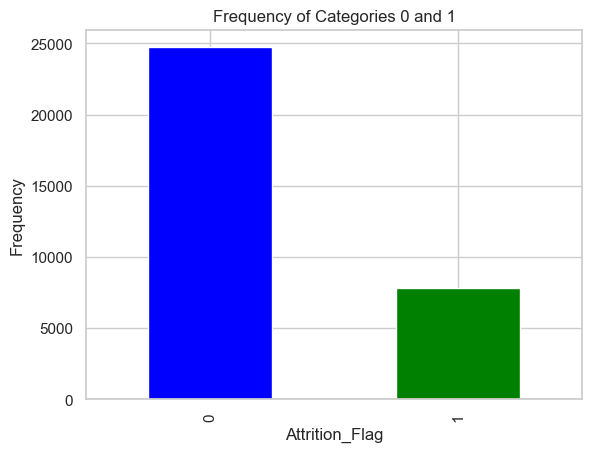

In [ ]:
# Count the occurrences of each category
category_counts = df['income'].value_counts().sort_index()

# Create the bar chart
category_counts.plot(kind='bar', color=['blue', 'green'])

# Add titles and labels
plt.xlabel('Attrition_Flag')
plt.ylabel('Frequency')
plt.title('Frequency of Categories 0 and 1')

# Display the chart
plt.show()

#### Visualize `income` wrt `sex` variable

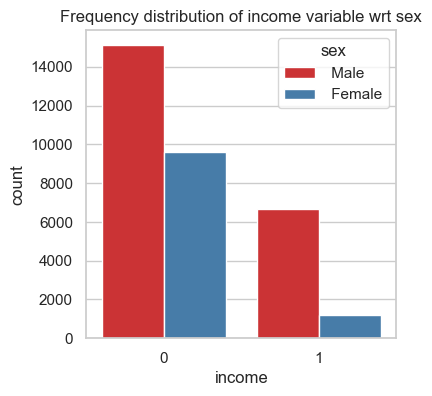

In [ ]:
f, ax = plt.subplots(figsize=(4, 4))
ax = sns.countplot(x="income", hue="sex", data=df, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt sex")
plt.show()

#### Interpretation


- We can see that males make more money than females in both the income categories.

#### Explore `occupation` variable

In [ ]:
df.head()

,age,education,occupation,sex,hours_per_week,income
0,39,Bachelors,Adm-clerical,Male,40,0
1,50,Bachelors,Exec-managerial,Male,13,0
2,38,HS-grad,Handlers-cleaners,Male,40,0
3,53,11th,Handlers-cleaners,Male,40,0
4,28,Bachelors,Prof-specialty,Female,40,0


In [ ]:
# view frequency distribution of values
df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

We can see that there are 1843 values encoded as `?` in occupation variable. I will replace these `?` with `NaN`.

In [ ]:
# replace '?' values in occupation variable with `NaN` with null value

df['occupation'].replace(' ?', np.NaN, inplace=True)

In [ ]:
# again check the frequency distribution of values
df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
df.isna().sum() ### i will have to treat he missing values now

age                  0
education            0
occupation        1843
sex                  0
hours_per_week       0
income               0
dtype: int64

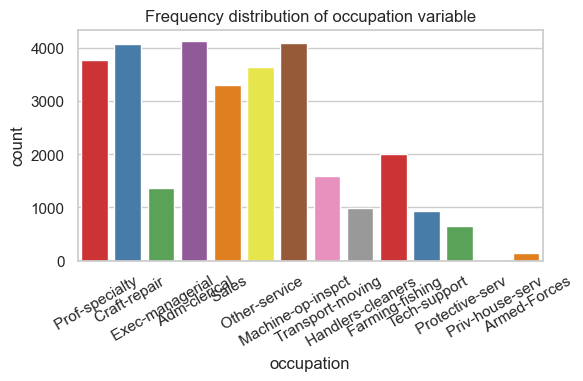

In [ ]:
# visualize frequency distribution of `occupation` variable

f, ax = plt.subplots(figsize=(6, 3))
ax = sns.countplot(x="occupation", data=df, palette="Set1")
ax.set_title("Frequency distribution of occupation variable")
ax.set_xticklabels(df.occupation.value_counts().index, rotation=30)
plt.show()

### 5.7 Check missing values in categorical variables

In [ ]:
df[categorical].isnull().sum()

education        0
occupation    1843
sex              0
dtype: int64

Now, we can see that `workclass`, `occupation` and `native_country` variable contains missing values.

### 5.8 Number of labels: Cardinality

- The number of labels within a categorical variable is known as **cardinality**.

- A high number of labels within a variable is known as **high cardinality**.

- High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [ ]:
# check for cardinality in categorical variables

for var in categorical:  ### checking the cardinality : no. of categories or labels or unique values in each categorical column

    print(var, ' contains ', df[var].nunique(), ' labels')

education  contains  16  labels
occupation  contains  14  labels
sex  contains  2  labels


We can see that native_country column contains relatively large number of labels as compared to other columns. I will check for cardinality after train-test split.

## 6. Explore Numerical Variables <a class="anchor" id="6"></a>


[Back to Table of Contents](#0.1)

### 6.1  Find numerical variables

In [ ]:
numerical = [var for var in df.columns if df[var].dtype!='O']  ## my data type should not be object , DT should be numeric

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)  ## list of numeric columns

There are 3 numerical variables

The numerical variables are :

 ['age', 'hours_per_week', 'income']


### 6.2 Preview the numerical variables

In [ ]:
df[numerical].head()

,age,hours_per_week,income
0,39,40,0
1,50,13,0
2,38,40,0
3,53,40,0
4,28,40,0


### 6.3 Summary of numerical variables

- There are 6 numerical variables.

- These are given by `age`, `fnlwgt`, `education_num`,`capital_gain`, `capital_loss` and `hours_per_week`.

- All of the numerical variables are of discrete data type.

### 6.4 Check missing values in numerical variables

In [ ]:
df[numerical].isnull().sum()

age               0
hours_per_week    0
income            0
dtype: int64

We can see that there are no missing values in the numerical variables.

### 6.5 Explore numerical variables

#### Explore `age` variable

In [ ]:
df['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

#### View the distribution of `age` variable

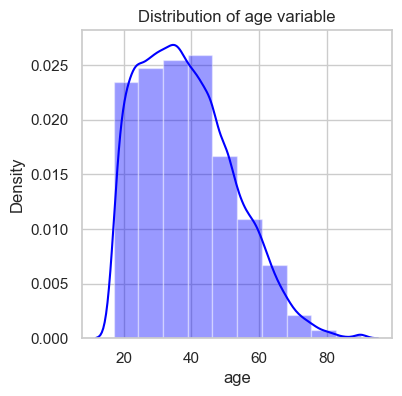

In [ ]:
f, ax = plt.subplots(figsize=(4,4))
x = df['age']
ax = sns.distplot(x, bins=10, color='blue')  ## used to get the distribution of a numerical variable
ax.set_title("Distribution of age variable")
plt.show()

We can see that `age` is slightly positively skewed.

#### Detect outliers in `age` variable with boxplot

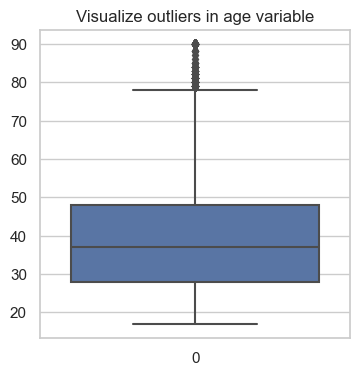

In [ ]:
f, ax = plt.subplots(figsize=(4,4))
x = df['age']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in age variable")
plt.show()

We can see that there are lots of outliers in `age` variable.

#### Explore relationship between `age` and `income` variables

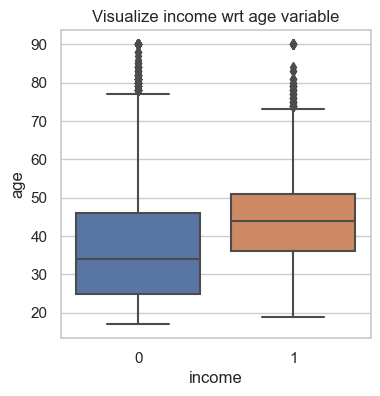

In [ ]:
f, ax = plt.subplots(figsize=(4, 4))
ax = sns.boxplot(x="income", y="age", data=df)
ax.set_title("Visualize income wrt age variable")
plt.show()

#### Interpretation

- As expected, younger people make less money as compared to senior people.

#### Visualize `income` wrt `age` and `sex` variable

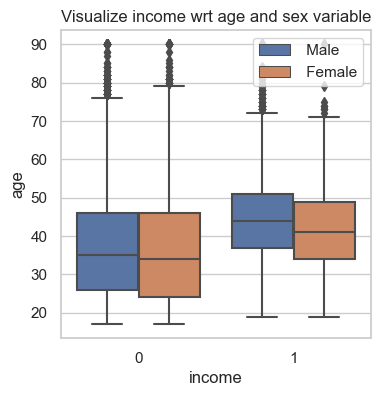

In [ ]:
f, ax = plt.subplots(figsize=(4, 4))
ax = sns.boxplot(x="income", y="age", hue="sex", data=df)
ax.set_title("Visualize income wrt age and sex variable")
ax.legend(loc='upper right')
plt.show()

<Figure size 800x600 with 0 Axes>

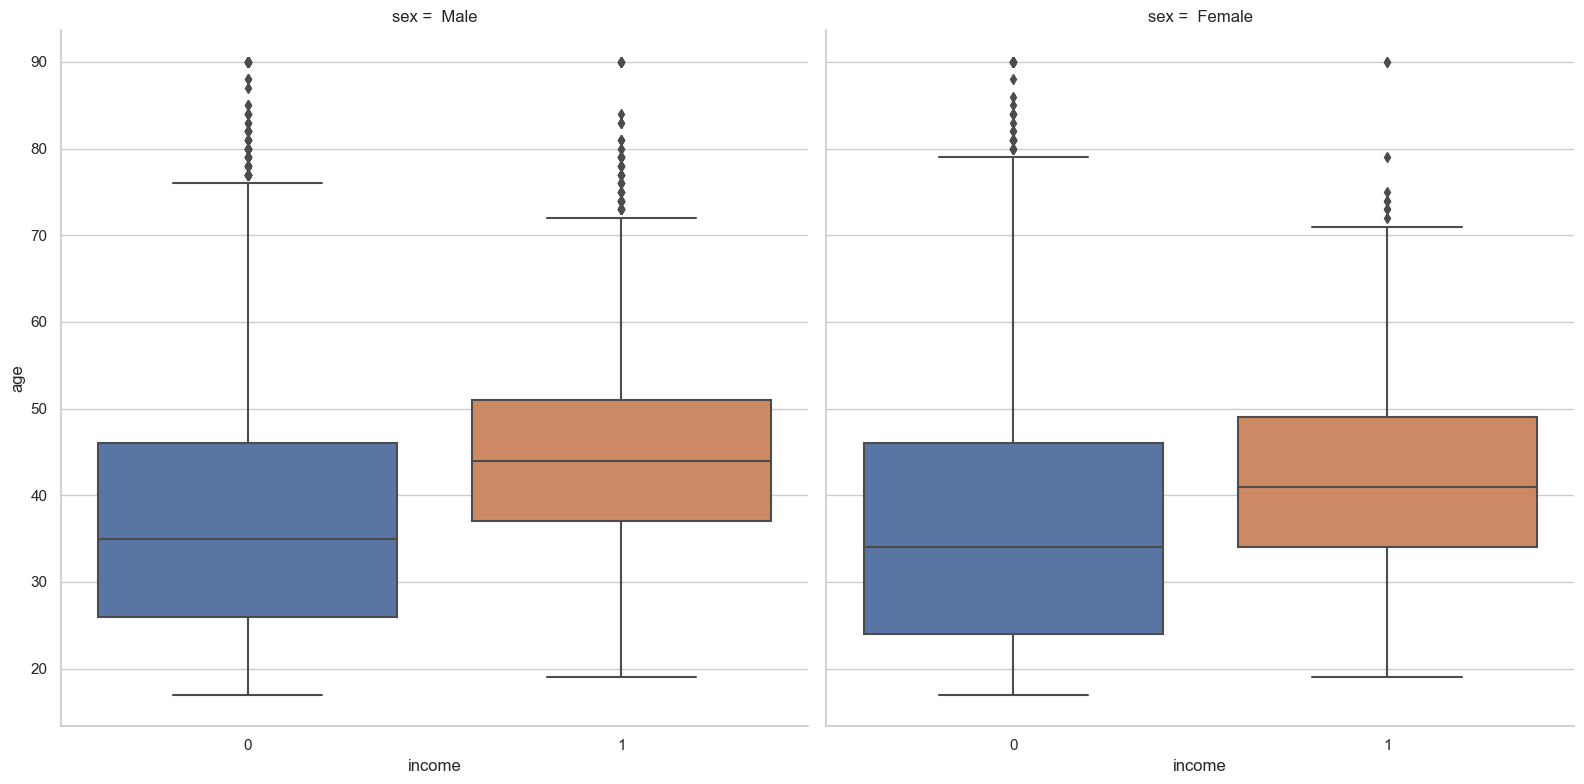

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.catplot(x="income", y="age", col="sex", data=df, kind="box", height=8, aspect=1)
plt.show()

#### Interpretation

- Senior people make more money than younger people.

#### Find out the correlations

In [ ]:
# plot correlation heatmap to find out correlations

df.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

## if your any 22 independent numerical variables are highly correlated ,
##it is better to drop one of such variables to avoid multicollinearity

,age,hours_per_week,income
age,1.0,0.06876,0.234
hours_per_week,0.06876,1.0,0.2297
income,0.234,0.2297,1.0


#### Interpretation

- We can see that there is no strong correlation between variables.

In [ ]:
df.head()

,age,education,occupation,sex,hours_per_week,income
0,39,Bachelors,Adm-clerical,Male,40,0
1,50,Bachelors,Exec-managerial,Male,13,0
2,38,HS-grad,Handlers-cleaners,Male,40,0
3,53,11th,Handlers-cleaners,Male,40,0
4,28,Bachelors,Prof-specialty,Female,40,0


In [ ]:
df.isna().sum()

age               0
education         0
occupation        0
sex               0
hours_per_week    0
income            0
dtype: int64

## TREATING MISSING VALUE

In [ ]:
# impute missing categorical variables with most frequent value :

df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)

In [ ]:
df.isna().sum()

age               0
education         0
occupation        0
sex               0
hours_per_week    0
income            0
dtype: int64

In [ ]:
df.head()

,age,education,occupation,sex,hours_per_week,income
0,39,Bachelors,Adm-clerical,Male,40,0
1,50,Bachelors,Exec-managerial,Male,13,0
2,38,HS-grad,Handlers-cleaners,Male,40,0
3,53,11th,Handlers-cleaners,Male,40,0
4,28,Bachelors,Prof-specialty,Female,40,0


## CATEGORICAL VARIABLES ENCODING

In [ ]:
df.head()

,age,education,occupation,sex,hours_per_week,income
0,39,Bachelors,Adm-clerical,Male,40,0
1,50,Bachelors,Exec-managerial,Male,13,0
2,38,HS-grad,Handlers-cleaners,Male,40,0
3,53,11th,Handlers-cleaners,Male,40,0
4,28,Bachelors,Prof-specialty,Female,40,0


In [ ]:
# Initialize LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding
df['education'] = label_encoder.fit_transform(df['education'])
df['occupation'] = label_encoder.fit_transform(df['occupation'])
df['sex'] = label_encoder.fit_transform(df['sex'])
df.tail()

,age,education,occupation,sex,hours_per_week,income
32556,27,7,12,0,38,0
32557,40,11,6,1,40,1
32558,58,11,0,0,40,0
32559,22,11,0,1,20,0
32560,52,11,3,0,40,1


In [ ]:
df.to_csv("dataset.csv")

In [ ]:
# import category encoders
## mapping , ohe , label encoder

import category_encoders as ce
# encode categorical variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=[ 'education', 'occupation', 'sex'])

df = encoder.fit_transform(df)
df.head()

ModuleNotFoundError: No module named 'category_encoders'

## 7. Declare feature vector and target variable <a class="anchor" id="7"></a>

[Back to Table of Contents](#0.1)

In [ ]:
X = df.drop(['income'], axis=1) ## independent variable

y = df['income']  ## dependent or target -- trying to predict

## 8. Split data into separate training and test set <a class="anchor" id="8"></a>

[Back to Table of Contents](#0.1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape, y_train.shape,y_test.shape

((22792, 34), (9769, 34), (22792,), (9769,))

In [ ]:
X_test.head()

,age,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,education_9,...,occupation_8,occupation_9,occupation_10,occupation_11,occupation_12,occupation_13,occupation_14,sex_1,sex_2,hours_per_week
22278,27,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,44
8950,27,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,40
7838,25,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,40
16505,46,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,40
19140,45,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,76


## 9. Feature Engineering  <a class="anchor" id="9"></a>


[Back to Table of Contents](#0.1)


- **Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power.

- I will carry out feature engineering on different types of variables.

- First, I will display the categorical and numerical variables in training set separately.

* We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called **feature scaling**. We will do it as follows.

## 10. Feature Scaling <a class="anchor" id="10"></a>

[Back to Table of Contents](#0.1)

In [ ]:
cols = X_train.columns
cols

Index(['age', 'education_1', 'education_2', 'education_3', 'education_4',
       'education_5', 'education_6', 'education_7', 'education_8',
       'education_9', 'education_10', 'education_11', 'education_12',
       'education_13', 'education_14', 'education_15', 'education_16',
       'occupation_1', 'occupation_2', 'occupation_3', 'occupation_4',
       'occupation_5', 'occupation_6', 'occupation_7', 'occupation_8',
       'occupation_9', 'occupation_10', 'occupation_11', 'occupation_12',
       'occupation_13', 'occupation_14', 'sex_1', 'sex_2', 'hours_per_week'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((22792, 34), (22792,), (9769, 34), (9769,))

In [ ]:
X_test.head()

,age,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,education_9,...,occupation_8,occupation_9,occupation_10,occupation_11,occupation_12,occupation_13,occupation_14,sex_1,sex_2,hours_per_week
0,-0.50,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.8
1,-0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0
2,-0.60,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.2


### MODEL TRAINING USING ALL MODELS TOGETHER

We now have X_train dataset ready to be fed into the classifier models. We will do it as follows.

In [ ]:
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold
from sklearn.metrics import roc_curve,accuracy_score,f1_score,auc,confusion_matrix,roc_auc_score #,plot_confusion_matrix
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
# List of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),    ## BASIC BUT FAST BOOSTING TECHNIQUE
    'Bagging': BaggingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),  ## TREE BASED CLASSIFIER
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True),    ## SUPPORT VECTOR MACHINES
    'KNN': KNeighborsClassifier(),   ## K NEAREST NEIGHBOURS
    'Naive Bayes': GaussianNB()     ## PROBABILITY BASED APPROACH
}

# Dictionaries to store results
results_train = {}
results_test = {}

# K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for name, clf in classifiers.items():
    # Cross-validation
    cv_results = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='accuracy')
    results_train[name] = {
        'CrossVal_Score_Mean': cv_results.mean(),
        'CrossVal_Error': cv_results.std()
    }

    # Train the model
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None

    # Evaluate the predictions
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 'N/A'
    clf_report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Store the evaluation metrics
    results_test[name] = {
        'Accuracy': accuracy,
        'F1_Score': f1,
        'ROC_AUC_Score': roc_auc,
        'Classification_Report': clf_report,
        'Confusion_Matrix': cm
    }

# Print the cross-validation results
for name, result in results_train.items():
    print(f"{name} (Training):")
    print(f"  CrossVal_Score_Mean: {result['CrossVal_Score_Mean']:.4f}")
    print(f"  CrossVal_Error: {result['CrossVal_Error']:.4f}")
    print()

# Print the test results
for name, result in results_test.items():
    print(f"{name} (Test):")
    print(f"  Accuracy: {result['Accuracy']:.4f}")
    print(f"  F1_Score: {result['F1_Score']:.4f}")
    print(f"  ROC_AUC_Score: {result['ROC_AUC_Score']}")
    print(f"  Classification_Report:\n{result['Classification_Report']}")
    print(f"  Confusion_Matrix:\n{result['Confusion_Matrix']}\n")


Logistic Regression (Training):
  CrossVal_Score_Mean: 0.8087
  CrossVal_Error: 0.0079

Random Forest (Training):
  CrossVal_Score_Mean: 0.7832
  CrossVal_Error: 0.0034

AdaBoost (Training):
  CrossVal_Score_Mean: 0.8144
  CrossVal_Error: 0.0068

Bagging (Training):
  CrossVal_Score_Mean: 0.7762
  CrossVal_Error: 0.0036

Extra Trees (Training):
  CrossVal_Score_Mean: 0.7789
  CrossVal_Error: 0.0025

Gradient Boosting (Training):
  CrossVal_Score_Mean: 0.8150
  CrossVal_Error: 0.0050

XGBoost (Training):
  CrossVal_Score_Mean: 0.8130
  CrossVal_Error: 0.0059

Decision Tree (Training):
  CrossVal_Score_Mean: 0.7613
  CrossVal_Error: 0.0051

SVM (Training):
  CrossVal_Score_Mean: 0.8120
  CrossVal_Error: 0.0044

KNN (Training):
  CrossVal_Score_Mean: 0.7916
  CrossVal_Error: 0.0039

Naive Bayes (Training):
  CrossVal_Score_Mean: 0.4741
  CrossVal_Error: 0.0131

Logistic Regression (Test):
  Accuracy: 0.8080
  F1_Score: 0.5120
  ROC_AUC_Score: 0.8282240567685076
  Classification_Report:
  

In [ ]:
classifiers

{'Logistic Regression': LogisticRegression(),
 'Random Forest': RandomForestClassifier(),
 'AdaBoost': AdaBoostClassifier(),
 'Bagging': BaggingClassifier(),
 'Extra Trees': ExtraTreesClassifier(),
 'Gradient Boosting': GradientBoostingClassifier(),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=None,
               n_jobs=None, num_parallel_

## HYPER PARAMETER TUNING

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


### 3*3*4*3*3*2*5 = 3240 fits

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


## FINALLY TRAINING THE MODEL WITH BEST HYPER PARAMETERS

In [ ]:
# Train the Random Forest model with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = best_rf.predict(X_train)
y_train_pred_proba = best_rf.predict_proba(X_train)[:, 1]

# Make predictions on the test set
y_test_pred = best_rf.predict(X_test)
y_test_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
train_clf_report = classification_report(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)
test_clf_report = classification_report(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Print the evaluation metrics
print("Training Metrics:")
print(f"  Accuracy: {train_accuracy:.4f}")
print(f"  F1_Score: {train_f1:.4f}")
print(f"  ROC_AUC_Score: {train_roc_auc:.4f}")
print(f"  Classification_Report:\n{train_clf_report}")
print(f"  Confusion_Matrix:\n{train_cm}\n")

print("Test Metrics:")
print(f"  Accuracy: {test_accuracy:.4f}")
print(f"  F1_Score: {test_f1:.4f}")
print(f"  ROC_AUC_Score: {test_roc_auc:.4f}")
print(f"  Classification_Report:\n{test_clf_report}")
print(f"  Confusion_Matrix:\n{test_cm}\n")

Training Metrics:
  Accuracy: 0.8378
  F1_Score: 0.5922
  ROC_AUC_Score: 0.8908
  Classification_Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     17313
           1       0.75      0.49      0.59      5479

    accuracy                           0.84     22792
   macro avg       0.80      0.72      0.75     22792
weighted avg       0.83      0.84      0.83     22792

  Confusion_Matrix:
[[16409   904]
 [ 2794  2685]]

Test Metrics:
  Accuracy: 0.8124
  F1_Score: 0.5265
  ROC_AUC_Score: 0.8443
  Classification_Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      7407
           1       0.68      0.43      0.53      2362

    accuracy                           0.81      9769
   macro avg       0.76      0.68      0.70      9769
weighted avg       0.80      0.81      0.80      9769

  Confusion_Matrix:
[[6917  490]
 [1343 1019]]



## FEATURE SELECTION - GETTING BEST MODEL FEATURES

In [ ]:
feature = pd.Series(best_rf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

age               0.320021
hours_per_week    0.157688
occupation_2      0.067957
sex_2             0.062676
education_1       0.056264
sex_1             0.052376
education_4       0.044861
education_11      0.032915
occupation_5      0.026997
occupation_4      0.026707
education_2       0.024725
education_10      0.020718
education_6       0.011894
occupation_6      0.009660
occupation_3      0.008863
occupation_9      0.008578
occupation_11     0.007193
education_9       0.006958
education_3       0.006698
occupation_10     0.006487
occupation_1      0.005955
occupation_7      0.005145
education_13      0.004961
occupation_8      0.004796
education_8       0.004182
occupation_12     0.004111
education_5       0.003884
education_7       0.003279
education_12      0.001521
education_16      0.000895
education_14      0.000780
occupation_14     0.000185
education_15      0.000069
occupation_13     0.000000
dtype: float64


## 16. Confusion matrix <a class="anchor" id="16"></a>


[Back to Table of Contents](#0.1)


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[6917  490]
 [1343 1019]]


<Axes: >

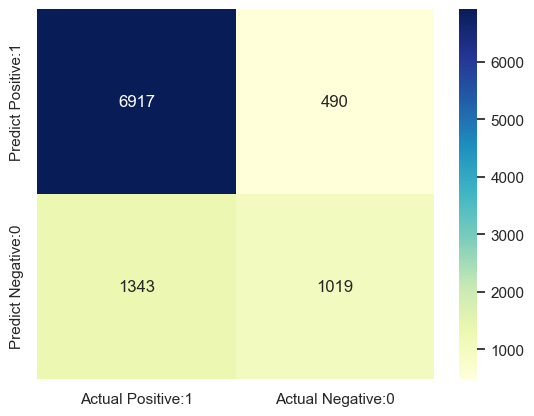

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## 17. Classification Report <a class="anchor" id="17"></a>


[Back to Table of Contents](#0.1)


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      7407
           1       0.68      0.43      0.53      2362

    accuracy                           0.81      9769
   macro avg       0.76      0.68      0.70      9769
weighted avg       0.80      0.81      0.80      9769

